## Llama 3.2 Vision Models
This code runs a demonstration of the Llama 3.2 11B Vision Instruct Model. The code is adapted from the HuggingFace model card. In order to run this model the latest transformers library is required as well as a login to HuggingFace Hub. You also need to request access to the model from Meta. This can be done on the HF model page: https://huggingface.co/meta-llama/Llama-3.2-11B-Vision-Instruct

In [1]:
# !pip install --upgrade transformers

In [2]:
from huggingface_hub import notebook_login
notebook_login()

In [3]:
import requests
import torch
# import numpy as np
from PIL import Image
# from matplotlib.pyplot import imshow
from IPython.display import display
from transformers import MllamaForConditionalGeneration, AutoProcessor

model_id = "meta-llama/Llama-3.2-11B-Vision-Instruct"

model = MllamaForConditionalGeneration.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)
processor = AutoProcessor.from_pretrained(model_id)

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

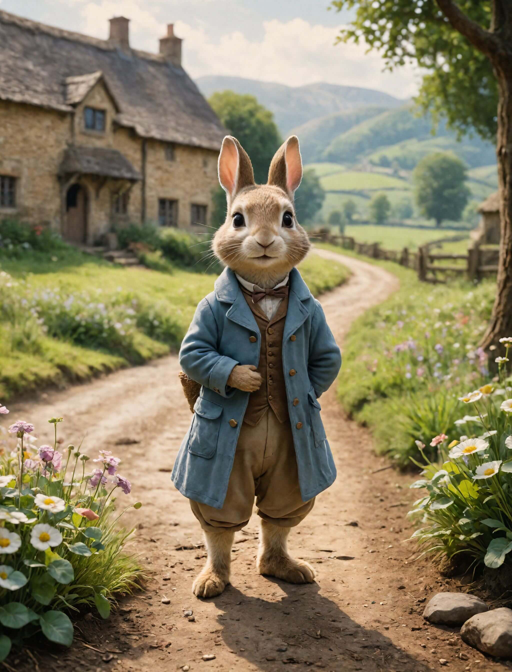

In [4]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/0052a70beed5bf71b92610a43a52df6d286cd5f3/diffusers/rabbit.jpg"
image = Image.open(requests.get(url, stream=True).raw)

width, height = image.size
display(image.resize((width//4,height//4)))

In [7]:
messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": "What do you see in this image?"}
    ]}
]
input_text = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(image, input_text, return_tensors="pt").to(model.device)

output = model.generate(**inputs, max_new_tokens=300)
print(processor.decode(output[0], skip_special_tokens=True))

user

What do you see in this image?assistant

This image is a digital illustration of a rabbit dressed in human-like clothing, standing on a dirt path in front of a house and flowers. The rabbit is wearing a blue coat, brown vest, and tan pants, and has a white shirt and brown bow tie. It has large ears and is looking at the camera with its mouth open. The background is a house with a thatched roof, surrounded by fields and hills. The overall atmosphere suggests a peaceful and serene setting, possibly in a rural or countryside area. The image may be intended to evoke a sense of nostalgia or wonder, as it combines elements of fantasy and reality in a unique and imaginative way.


## Conclusion
As we can see the model is correctly interpreting the input image. This model powerful and is able to be run locally on a PC with 24GB of VRAM.